# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [ ]:
import numpy as np

### Generate data

In [ ]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    y=np.sin(x)
    return y

In [ ]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [ ]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    x=np.random.rand(N)
    yd=fx(x)
    return x, yd

In [ ]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

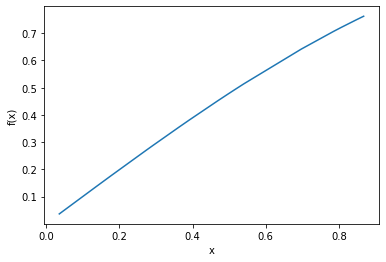

In [ ]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [ ]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    N=len(x)
    A=np.zeros((N,D+1))
    for i in range (0,N):
      for j in range (0,D+1):
        A[i][j]=x[i]**j
    return A

In [ ]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution and min-norm solution you learnt in the video

In [ ]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    At=np.transpose(A)
    A_inv=np.matmul(np.linalg.inv(np.matmul(At,A)),At)
    w=np.matmul(A_inv,yd)
    min_=np.amin(w)
    max_=np.amax(w)
    for i in range (0,len(w)):
      w[i]=(w[i]-min_)/(max_-min_)
    return w

In [ ]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [ ]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    D=len(w)-1
    A=createA(x, D)
    y=np.matmul(A,w)
    return y

In [ ]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [ ]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    N=len(y)
    diff_sum=0
    for i in range(0,N):
      diff_sum+=((yd[i]-y[i])**2)
    mse=(diff_sum/N)
    return mse

In [ ]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [ ]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [ ]:
def trainModel(N,D):
  x,yd=generateX_fx(N)
  A=createA(x, D)
  w=train_w(A, yd)
  y=predict_y(w, x)
  mse=compute_mse(y, yd)
  return x,y,yd,w,mse

In [ ]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    x,yd=generateX_fx(Ntest)
    y=predict_y(w,x)
    mse=compute_mse(y,yd)
    return x, y, yd, mse

[0.15403688 1.         0.13121884 0.14701145 0.01720955 0.31844289
 0.         0.22993925 0.12775365 0.16790444 0.15748515]
MSE on train data =  0.4348975760121506
MSE on test data =  0.2832030687330756
Test passed 👍


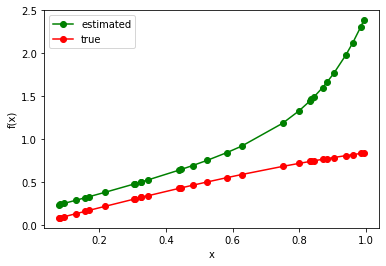

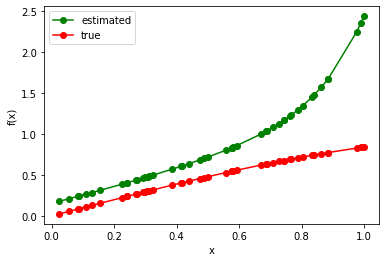

In [ ]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED(Optional)

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

In [ ]:
def plotModel1(m1,m2,n):
    import matplotlib.pyplot as plt
    i = n.argsort()
    plt.figure()
    plt.plot(n[i],m1[i],'g-o')
    plt.plot(n[i],m2[i],'r-o')
    plt.ylabel('error')
    plt.xlabel('N')
    plt.legend(['train', 'test'])

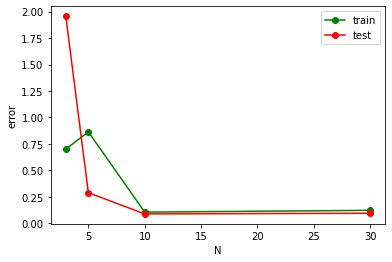

In [ ]:
N=[3,5,10,30]
D=5
train_error=[]
test_error=[]
for n in range(0,len(N)):
  x, y, yd, w, mse = trainModel(N[n],D)
  train_error.append(mse)
  x, y, yd, mse = testModel(N[n],w)
  test_error.append(mse)
N=np.array(N)
train_error=np.array(train_error)
test_error=np.array(test_error)
plotModel1(train_error,test_error,N)

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

In [ ]:
c=0
def plotModel2(m1,m2,p):
    import matplotlib.pyplot as plt
    i = m1.argsort()
    plt.figure()
    plt.plot(m1[i],m2[i],'g-o')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title(p)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


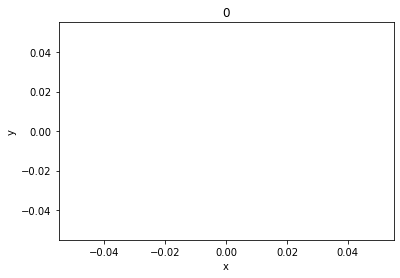

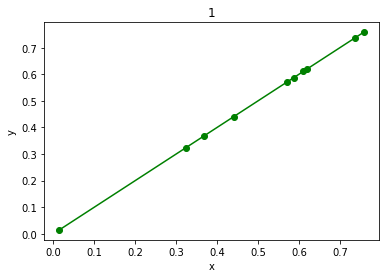

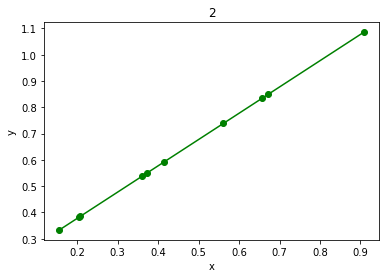

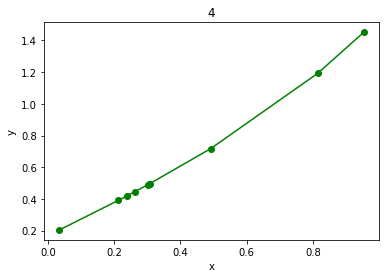

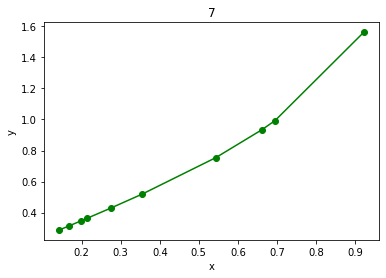

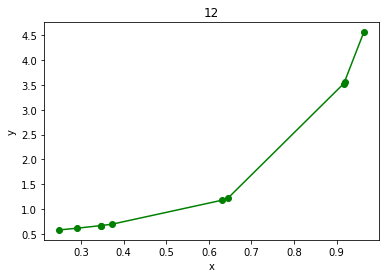

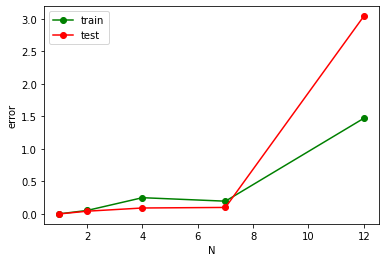

In [ ]:
D=[0,1,2,4,7,12]
N=10
train_error=[]
test_error=[]
D=np.array(D)
for d in range(0,len(D)):
  x, y, yd, w, mse = trainModel(N,D[d])
  train_error.append(mse)
  x, y, yd, mse = testModel(N,w)
  test_error.append(mse)
  plotModel2(np.array(x),np.array(y),D[d])
train_error=np.array(train_error)
test_error=np.array(test_error)
plotModel1(train_error,test_error,D)